<a href="https://colab.research.google.com/github/ganeshred/NLPAuthorshipAttributionNLM/blob/main/LSTM_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchtext==0.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.1
    Uninstalling torchtext-0.15.1:
      Successfully uninstalled torchtext-0.15.1


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import torch
from torchtext import data
from torchtext import datasets

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(tokenize = 'spacy',tokenizer_language='en_core_web_sm', include_lengths = True)
LABEL = data.LabelField(dtype = torch.float)

In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv('/content/gdrive/MyDrive/task1_final.csv')
df = pd.read_csv('/content/gdrive/MyDrive/NLP/Task1_balanced.csv')

In [3]:
len(df)

23452

In [4]:
df.head()

,Unnamed: 0,T1,T2,class
0,1066,Latest Headlines on CNN Business the great shu...,disneyland closes because of the coronavirus o...,0.0
1,1067,China wants to take a victory lap over its han...,"on politics: 'a major war' to the editor: re ""...",0.0
2,1068,Coronavirus disinformation creates challenges ...,most states make it difficult for children to ...,0.0
3,1069,China coronavirus: Eating wild animals made il...,why india's citizenship law crosses the line t...,0.0
4,1070,China's economy could shrink for the first tim...,christchurch mosques shooting victim one-year ...,0.0


In [5]:
df['Text'] = df['T1']+df['T2']

In [6]:
df = df.dropna()

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# # Load the movie reviews dataset as a Pandas DataFrame
# # df = pd.read_csv('movie_reviews.csv')

# # Vectorize the text data using TF-IDF
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(df['Text']).toarray()

# # Standardize the data using StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Perform PCA with 2 components
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# # Plot the transformed data
# import matplotlib.pyplot as plt
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['label'])
# plt.show()

# # Print the variance explained by each component
# print(pca.explained_variance_ratio_)

# # Print the top 10 most important features for each component
# for i, component in enumerate(pca.components_):
#     idx = component.argsort()[-10:][::-1]
#     features = [vectorizer.get_feature_names()[j] for j in idx]
#     print(f"Component {i}: {features}")


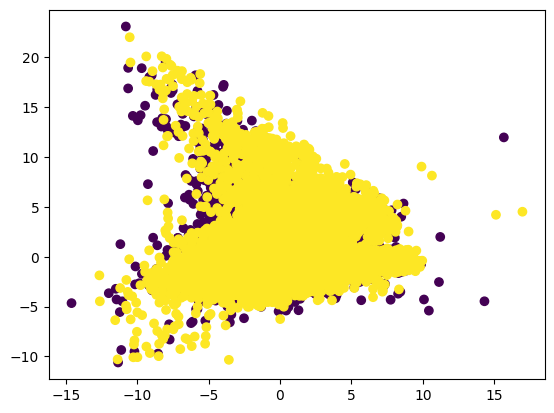

[0.2213135  0.13591245]
Component 0: [')', '``', '-', 'to', 'by', 'is', "''", 'after', 'a', 'has']
Component 1: ['from', 'have', ',', 'are', 'at', 'had', 'not', ':', 'or', '.']


In [12]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors
from sklearn.preprocessing import StandardScaler


import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

# Load the movie reviews dataset as a Pandas DataFrame
# df = pd.read_csv('movie_reviews.csv')

# Load the GloVe embeddings
word_vectors = {}
with open('glove.6B.50d.txt', 'rb') as f:
    for line in f:
        word, vec = line.split(maxsplit=1)
        word_vectors[word.decode()] = np.fromstring(vec, sep=' ')

# Create a matrix of sentence embeddings using the GloVe embeddings
X = np.array([np.mean([word_vectors[w] for w in review.split() if w in word_vectors] or [np.zeros(50)], axis=0)
              for review in df['Text']])

# Standardize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the transformed data
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['class'])
plt.show()

# Print the variance explained by each component
print(pca.explained_variance_ratio_)

# # Print the top 10 most important features for each component
# for i, component in enumerate(pca.components_):
#     idx = component.argsort()[-10:][::-1]
#     features = [list(word_vectors.keys())[j] for j in idx]
#     print(f"Component {i}: {features}")


In [ ]:
df.head()

,Unnamed: 0,T1,T2,class
0,1066,Latest Headlines on CNN Business the great shu...,disneyland closes because of the coronavirus o...,0.0
1,1067,China wants to take a victory lap over its han...,"on politics: 'a major war' to the editor: re ""...",0.0
2,1068,Coronavirus disinformation creates challenges ...,most states make it difficult for children to ...,0.0
3,1069,China coronavirus: Eating wild animals made il...,why india's citizenship law crosses the line t...,0.0
4,1070,China's economy could shrink for the first tim...,christchurch mosques shooting victim one-year ...,0.0


In [ ]:
df['text'] = df['T1']+df['T2']

In [ ]:
# df.head()
df = df.rename(columns={'class': 'label'})

In [ ]:


df = df[['text','label']]

In [ ]:
df[['text']] = df[['text']]. astype(str)

In [ ]:
# text_field = data.Field(
#     sequential=True,
#     tokenize='basic_english', 
#     fix_length=500,
#     lower=True
# )
TEXT = data.Field(tokenize = 'spacy', tokenizer_language='en_core_web_sm', include_lengths = True)
LABEL = data.LabelField(sequential=False, use_vocab=False, dtype = torch.float)

# label_field = data.Field(sequential=False, use_vocab=False)

# sadly have to apply preprocess manually
preprocessed_text = df['text'].apply(
    lambda x: TEXT.preprocess(x)
)

# load fastext simple embedding with 300d
TEXT.build_vocab(
    preprocessed_text, 
    max_size = 20000,
    vectors='glove.6B.50d',
    unk_init = torch.Tensor.normal_
)

# get the vocab instance
vocab = TEXT.vocab

.vector_cache/glove.6B.zip: 862MB [02:40, 5.36MB/s]                           
100%|█████████▉| 399999/400000 [00:12<00:00, 31752.87it/s]


In [ ]:
ltoi = {l: i for i, l in enumerate(df['label'].unique())}

In [ ]:
df['label1'] = df['label'].apply(lambda y: ltoi[y])

class DataFrameDataset(data.Dataset):
    def __init__(self, df: pd.DataFrame, fields: list):
        super(DataFrameDataset, self).__init__(
            [
                data.Example.fromlist(list(r), fields) 
                for i, r in df.iterrows()
            ], 
            fields
        )

In [ ]:
df1=df[['text','label1']]

In [ ]:
examples=[]
for i,row in df1.iterrows():
  # print(example)
  examples.append(data.Example.fromlist(row, fields=[('text', TEXT), ('label', LABEL)]))

In [ ]:
# examples[2000].label
c=0
for i in examples:
  if type(i.label) != int:
    c+=1

In [ ]:
c

0

In [ ]:
dataset = data.Dataset(examples, fields=[('text', TEXT), ('label', LABEL)])

In [ ]:
train_dataset, test_dataset, valid_dataset = dataset.split(split_ratio=[0.6, 0.2, 0.2], stratified=True, strata_field='label')

In [ ]:
len(train_dataset)

14072

In [ ]:
ltoi

{0.0: 0, 1.0: 1}

In [ ]:
import torch
torch.cuda.empty_cache()


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("We are working with ", device)
# device = 'cpu'
train_iter, test_iter, valid_iter = data.BucketIterator.splits(
    datasets=(train_dataset, test_dataset, valid_dataset), 
    batch_size=16,
    sort_within_batch = True,
    sort_key=lambda x: len(x.text),
    device=device
)

We are working with  cuda


In [ ]:
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout, pad_idx):
        super().__init__()
        #1. Initialize Embedding Layer
        self.embedding = nn.Embedding(num_embeddings = vocab_size, embedding_dim = embedding_dim, padding_idx = pad_idx)
        #2. Initialize LSTM layer
        self.lstm = nn.LSTM(input_size = embedding_dim, hidden_size = hidden_dim, num_layers = n_layers, dropout = dropout, bidirectional = bidirectional)
        #3. Initialize a fully connected layer with Linear transformation
        self.fc = nn.Linear(hidden_dim * n_layers, output_dim)
        #4. Initialize Dropout
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text, text_lengths):
        #1. Apply embedding layer that matches each word to its vector and apply dropout. Dim [sent_len, batch_size, emb_dim]
        embedding = self.embedding(text)
        embedding_dropout = self.dropout(embedding)
        #2. Run the LSTM along the sentences of length sent_len. #output = [sent len, batch size, hid dim * num directions]; #hidden = [num layers * num directions, batch size, hid dim]
        output, (hidden,cell) = self.lstm(embedding_dropout)
        #3. Concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers and apply dropout
        concat = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        hidden = self.dropout(concat)     
        return self.fc(hidden)

In [ ]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 50
HIDDEN_DIM = 126
OUTPUT_DIM = 2
N_LAYERS = 2
BIDIRECTIONAL = False
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = LSTM(INPUT_DIM, 
            EMBEDDING_DIM, 
            HIDDEN_DIM, 
            OUTPUT_DIM, 
            N_LAYERS, 
            BIDIRECTIONAL, 
            DROPOUT,
            PAD_IDX)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 1,218,334 trainable parameters


In [ ]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([20002, 50])


In [ ]:
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.1117, -0.4966,  0.1631,  ...,  0.7372,  0.3910,  0.5158],
        [ 0.1825, -0.0737,  0.3147,  ...,  1.3226, -2.6796, -0.1297],
        [ 0.1516,  0.3018, -0.1676,  ..., -0.3565,  0.0164,  0.1022],
        ...,
        [ 1.1941, -0.9230, -0.6889,  ...,  0.3863, -0.8096,  1.2940],
        [ 0.7168,  0.0894,  0.0470,  ..., -0.2375,  0.5867, -1.3436],
        [ 0.8518, -0.1653, -0.7702,  ..., -0.0852, -0.6297, -0.0945]])

In [ ]:
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

print(model.embedding.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.1516,  0.3018, -0.1676,  ..., -0.3565,  0.0164,  0.1022],
        ...,
        [ 1.1941, -0.9230, -0.6889,  ...,  0.3863, -0.8096,  1.2940],
        [ 0.7168,  0.0894,  0.0470,  ..., -0.2375,  0.5867, -1.3436],
        [ 0.8518, -0.1653, -0.7702,  ..., -0.0852, -0.6297, -0.0945]])


In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

In [ ]:
criterion = nn.CrossEntropyLoss()

# device='cpu'
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
# def binary_accuracy(preds, y):
#     """
#     Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
#     """
#     # get the index of the highest prediction for each instance
#     _, preds = torch.max(preds, dim=1)
#     correct = (preds == y).float() #convert into float for division 
#     acc = correct.sum() / len(correct)
#     return acc

# def binary_accuracy(preds, y):
#     """
#     Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
#     """
#     #round predictions to the closest integer
#     rounded_preds = torch.round(torch.sigmoid(preds))
#     # predicted_labels = torch.argmax(rounded_preds, dim=1)

#     # print(predicted_labels.shape)
#     # print(y.shape)
#     correct = (rounded_preds == y).float() #convert into float for division 
#     acc = correct.sum() / len(correct)
#     return acc

def multiclass_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    # get the index of the highest prediction for each instance
    _, preds = torch.max(preds, dim=1)
    correct = (preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc


In [ ]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        # print(batch.text)
        text, text_lengths = batch.text
        
        predictions = model(text, text_lengths).squeeze(1)

        target = batch.label
        target = target.type(torch.LongTensor)

        # print(target)

        # print(predictions)
        
        loss = criterion(predictions.to(device), target.to(device))
        
        acc = multiclass_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for batch in iterator:
            
            text, text_lengths = batch.text
            
            predictions = model(text, text_lengths).squeeze(1)
            target = batch.label
            target = target.type(torch.LongTensor)
            
            loss = criterion(predictions.to(device), target.to(device))
            
            acc = multiclass_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
            
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
train_losses_list = []
valid_losses_list = []
train_accs=[]
valid_accs=[]

In [ ]:
N_EPOCHS = 25
path = F"/content/gdrive/My Drive/bilstm_model_task1.pt"
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    # torch.cuda.empty_cache()
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iter, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iter, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), path)

    train_losses_list.append(train_loss)
    valid_losses_list.append(valid_loss)
    train_accs.append(train_acc*100)
    valid_accs.append(valid_acc*100)
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 33s
	Train Loss: 0.652 | Train Acc: 64.48%
	 Val. Loss: 0.663 |  Val. Acc: 60.65%
Epoch: 02 | Epoch Time: 0m 30s
	Train Loss: 0.645 | Train Acc: 65.01%
	 Val. Loss: 0.746 |  Val. Acc: 57.50%
Epoch: 03 | Epoch Time: 0m 31s
	Train Loss: 0.638 | Train Acc: 65.26%
	 Val. Loss: 0.680 |  Val. Acc: 58.89%
Epoch: 04 | Epoch Time: 0m 31s
	Train Loss: 0.629 | Train Acc: 65.19%
	 Val. Loss: 0.688 |  Val. Acc: 59.82%
Epoch: 05 | Epoch Time: 0m 31s
	Train Loss: 0.612 | Train Acc: 65.72%
	 Val. Loss: 0.660 |  Val. Acc: 60.23%
Epoch: 06 | Epoch Time: 0m 30s
	Train Loss: 0.602 | Train Acc: 65.87%
	 Val. Loss: 0.660 |  Val. Acc: 61.12%
Epoch: 07 | Epoch Time: 0m 31s
	Train Loss: 0.599 | Train Acc: 66.48%
	 Val. Loss: 0.677 |  Val. Acc: 59.99%
Epoch: 08 | Epoch Time: 0m 31s
	Train Loss: 0.594 | Train Acc: 66.63%
	 Val. Loss: 0.671 |  Val. Acc: 60.37%
Epoch: 09 | Epoch Time: 0m 30s
	Train Loss: 0.591 | Train Acc: 67.09%
	 Val. Loss: 0.682 |  Val. Acc: 60.52%
Epoch: 10 | Epoch T

In [ ]:
test_loss, test_acc = evaluate(model, test_iter, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.840 | Test Acc: 50.43%


In [ ]:
test_loss, test_acc = evaluate(model, valid_iter, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.854 | Test Acc: 48.77%


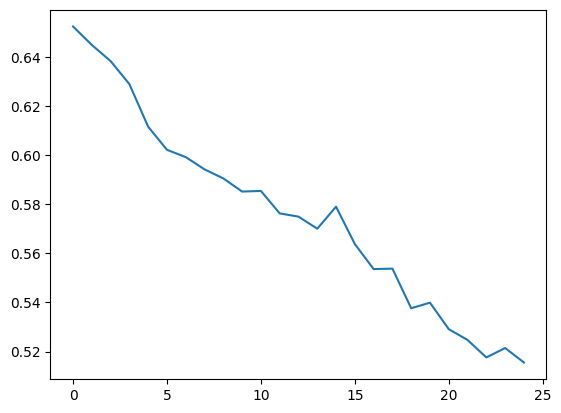

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses_list)

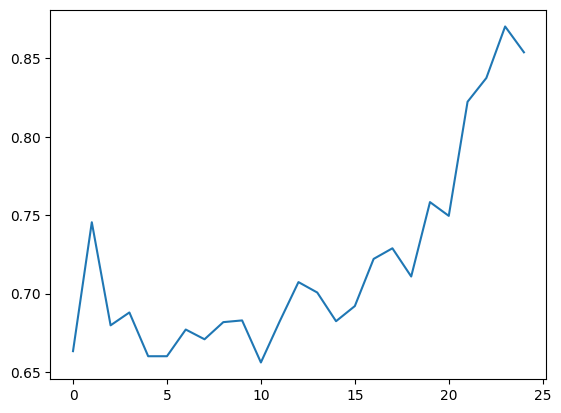

In [ ]:
plt.plot(valid_losses_list)

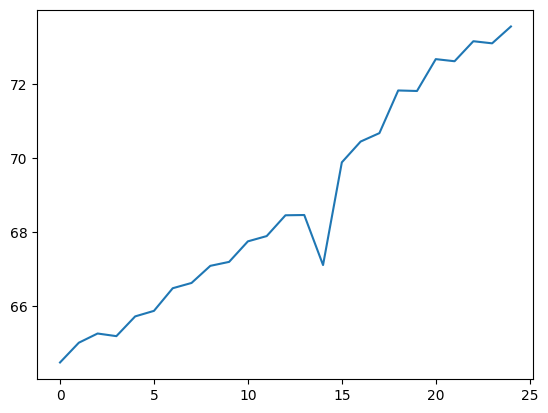

In [ ]:
plt.plot(train_accs)

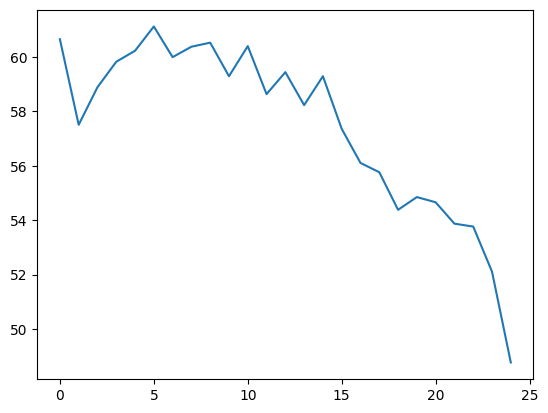

In [ ]:
plt.plot(valid_accs)